# 3회차 실습 과제: 추정과 가설검정

## 문제 항목

| 문제     | 주제                 | 핵심 개념                                       |
|----------|----------------------|-------------------------------------------------|
| 문제 1   | 신뢰구간 계산        | 점추정, 구간추정, 신뢰수준, 표본크기 결정        |
| 문제 2   | 단일표본 검정        | 가설 설정, t-검정, p-value 해석, 결론 도출       |
| 문제 3   | 두 그룹 비교         | 독립표본 t-검정, 효과크기, 단일 vs 독립 vs 대응 구분     |
| 문제 4   | 전후 비교   | 대응표본 t-검정, 검정력   |

---

## 핵심 공식 정리

### 신뢰구간

| 조건              | 공식                                                             |
|-------------------|------------------------------------------------------------------|
| σ를 아는 경우     | $\bar{X} \pm z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$       |
| σ를 모르는 경우   | $\bar{X} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}$      |
| 필요 표본크기     | $n = \left(\frac{z_{\alpha/2} \cdot \sigma}{E}\right)^2$       |

### 검정통계량

| 검정               | 공식                                                                             |
|--------------------|----------------------------------------------------------------------------------|
| z-검정             | $z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}$                                |
| 단일표본 t-검정    | $t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}}, \quad df = n - 1$                   |
| 독립표본 t-검정    | $t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{s_1^2/n_1 + s_2^2/n_2}}$              |
| 대응표본 t-검정    | $t = \frac{\bar{d}}{s_d / \sqrt{n}}, \quad d_i = X_{after} - X_{before}$       |
| Cohen's d          | $d = \frac{|\bar{X}_1 - \bar{X}_2|}{s_{pooled}}$                               |

### scipy.stats 핵심 함수

| 함수                          | 설명                           | 사용 예시                                    |
|-------------------------------|--------------------------------|----------------------------------------------|
| `stats.t.interval()`         | t분포 기반 신뢰구간            | `stats.t.interval(0.95, df, loc, scale)`     |
| `stats.t.ppf()`              | t분포 임계값                   | `stats.t.ppf(0.975, df=29)`                 |
| `stats.ttest_1samp()`        | 단일표본 t-검정                | `stats.ttest_1samp(data, popmean=100)`       |
| `stats.ttest_ind()`          | 독립표본 t-검정                | `stats.ttest_ind(a, b, equal_var=False)`     |
| `stats.ttest_rel()`          | 대응표본 t-검정                | `stats.ttest_rel(after, before)`             |
| `stats.sem()`                | 표준오차 계산                  | `stats.sem(data)`                            |

### 판정 규칙

| p-value 결과  | 판정             | 해석                                          |
|---------------|------------------|-----------------------------------------------|
| p ≤ α         | H0 **기각**      | "이 결과가 우연이라고 보기 어렵습니다" → 유의   |
| p > α         | H0 **기각 실패** | "증거 부족, 판단 보류" (H0가 참은 아닙니다!)    |

---

In [10]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import platform

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("=" * 60)
print("3회차 실습 과제: 추정과 가설검정")
print("=" * 60)

3회차 실습 과제: 추정과 가설검정


---

## 문제 1: 신뢰구간 계산

### 시나리오: 배달 앱 배달 시간 분석

배달 앱 운영팀이 평균 배달 시간을 파악하려 합니다.

40건의 배달 데이터를 수집했습니다.

**주어진 데이터:**

In [11]:
print("\n[문제 1] 배달 앱 배달 시간 분석")
print("=" * 50)

np.random.seed(42)
delivery_times = np.random.normal(loc=35, scale=8, size=40)
delivery_times = np.round(delivery_times, 1)

print(f"배달 시간 데이터 (n = {len(delivery_times)}건):")
print(delivery_times)


[문제 1] 배달 앱 배달 시간 분석
배달 시간 데이터 (n = 40건):
[39.  33.9 40.2 47.2 33.1 33.1 47.6 41.1 31.2 39.3 31.3 31.3 36.9 19.7
 21.2 30.5 26.9 37.5 27.7 23.7 46.7 33.2 35.5 23.6 30.6 35.9 25.8 38.
 30.2 32.7 30.2 49.8 34.9 26.5 41.6 25.2 36.7 19.3 24.4 36.6]


### 문제 1-1: 점추정

**(a)** 모평균의 점추정값(표본평균)을 구하세요.

**(b)** 모표준편차의 점추정값(표본표준편차, ddof=1)을 구하세요.

**(c)** 표준오차(SE)를 구하세요.

In [12]:
print("\n[문제 1-1] 점추정")
print("-" * 40)

# TODO (a): 표본평균
x_bar = round(np.mean(delivery_times),3)

print(f"(a) 표본평균 = {x_bar}")

# TODO (b): 표본표준편차 (ddof=1)
s = round(np.std(delivery_times, ddof=1),3)

print(f"(b) 표본표준편차 = {s}")

# TODO (c): 표준오차 SE = s / sqrt(n)
n = len(delivery_times)
se = s / np.sqrt(n)

print(f"(c) 표준오차 SE = {se}")



[문제 1-1] 점추정
----------------------------------------
(a) 표본평균 = 33.245
(b) 표본표준편차 = 7.621
(c) 표준오차 SE = 1.204985902407161


### 문제 1-2: 신뢰구간 구하기

**(a)** 95% 신뢰구간을 **수동으로** 계산하세요.

**(b)** `stats.t.interval()`를 사용하여 95% 신뢰구간을 구하세요.

**(c)** 90%, 95%, 99% 신뢰구간을 모두 구하고, 구간 너비를 비교하세요.

> 신뢰수준이 높아지면 구간 너비는 어떻게 변하나요?

In [13]:
print("\n[문제 1-2] 신뢰구간 구하기")
print("-" * 40)

n = len(delivery_times)
alpha = 0.05

# TODO (a): 수동 계산
t_crit = stats.t.ppf(1-alpha/2, df=n-1)  # t 임계값
margin = t_crit * se # 오차한계 = t_crit * se
ci_low = x_bar - margin  # 하한
ci_high = x_bar + margin  # 상한

print(f"(a) 수동 계산:")
print(f"    t 임계값 (df={n-1}): {t_crit}")
print(f"    오차한계: ±{margin}")
print(f"    95% CI: [{ci_low}, {ci_high}]")


# TODO (b): scipy.stats 활용
ci_scipy = stats.t.interval(0.95, df=n-1, loc=x_bar, scale=se)  # scipy활용 신뢰 구간

print(f"\n(b) scipy 활용:")
print(f"    95% CI: {ci_scipy}")


# TODO (c): 세 가지 신뢰수준 너비 비교
print(f"\n(c) 신뢰수준별 비교:")
for confidence in [0.90, 0.95, 0.99]:
    ci = stats.t.interval(confidence, df=n-1, loc=x_bar, scale=se)
    width = ci[1] - ci[0]
    print(f"    {confidence*100:.0f}% CI: {ci}  (너비: {width})")

# print("\n    해석: ...")



[문제 1-2] 신뢰구간 구하기
----------------------------------------
(a) 수동 계산:
    t 임계값 (df=39): 2.022690920036761
    오차한계: ±2.437314043571267
    95% CI: [30.80768595642873, 35.68231404357127]

(b) scipy 활용:
    95% CI: (np.float64(30.80768595642873), np.float64(35.68231404357127))

(c) 신뢰수준별 비교:
    90% CI: (np.float64(31.214749231021422), np.float64(35.27525076897857))  (너비: 4.060501537957151)
    95% CI: (np.float64(30.80768595642873), np.float64(35.68231404357127))  (너비: 4.874628087142536)
    99% CI: (np.float64(29.98200278891872), np.float64(36.507997211081275))  (너비: 6.5259944221625545)


### 문제 1-3: 표본크기 결정

경영진이 "평균 배달 시간의 **오차한계를 ±1분 이내**로 하고 싶다"고 합니다.

**(a)** 95% 신뢰수준에서 필요한 최소 표본크기를 구하세요.

**(b)** 오차한계를 ±0.5분으로 줄이면 표본크기가 어떻게 변하나요?

In [14]:
print("\n[문제 1-3] 표본크기 결정")
print("-" * 40)

z_95 = 1.96
sigma_est = np.std(delivery_times, ddof=1)  # 표본표준편차를 σ 추정치로 사용

# TODO (a): 오차한계 ±1분
E1 = 1.0
n_required_1 = np.ceil((z_95 * sigma_est / E1) ** 2)  # (z_95 * sigma_est / E1) ** 2 → 올림

print(f"(a) 오차한계 ±{E1}분 → 필요 표본크기: {n_required_1}건")


# TODO (b): 오차한계 ±0.5분
E2 = 0.5
n_required_2 = np.ceil((z_95 * sigma_est / E2) ** 2)

print(f"(b) 오차한계 ±{E2}분 → 필요 표본크기: {n_required_2}건")

print(f"\n    해석: 오차 한계를 1분에서 0.5분으로 줄이니 필요한 표본 크기가 224에서 893으로 커진다")


[문제 1-3] 표본크기 결정
----------------------------------------
(a) 오차한계 ±1.0분 → 필요 표본크기: 224.0건
(b) 오차한계 ±0.5분 → 필요 표본크기: 893.0건

    해석: 오차 한계를 1분에서 0.5분으로 줄이니 필요한 표본 크기가 224에서 893으로 커진다


---

## 문제 2: 단일표본 t-검정

### 시나리오: 음료 자판기 용량 검사

자판기 제조사는 커피 한 잔의 용량이 **200ml**이라고 주장합니다.

소비자 보호원이 무작위로 20잔을 측정하여 주장을 검증합니다.

**주어진 데이터:**

In [15]:
print("\n[문제 2] 자판기 용량 검사")
print("=" * 50)

np.random.seed(123)
coffee_ml = np.random.normal(loc=196, scale=6, size=20)
coffee_ml = np.round(coffee_ml, 1)

print(f"측정 데이터 (n = {len(coffee_ml)}잔):")
print(coffee_ml)
print(f"\n표본평균: {np.mean(coffee_ml):.2f}ml")
print(f"표본표준편차: {np.std(coffee_ml, ddof=1):.2f}ml")



[문제 2] 자판기 용량 검사
측정 데이터 (n = 20잔):
[189.5 202.  197.7 187.  192.5 205.9 181.4 193.4 203.6 190.8 191.9 195.4
 204.9 192.2 193.3 193.4 209.2 209.1 202.  198.3]

표본평균: 196.68ml
표본표준편차: 7.54ml


### 문제 2-1: 가설검정 5단계

유의수준 α = 0.05에서, 자판기 용량이 200ml에 미달하는지 검정하세요.

**(a)** 가설을 설정하세요.

**(b)** `stats.ttest_1samp()`으로 검정통계량과 p-value를 구하세요.

**(c)** 결론을 내리세요. (기각 또는 기각 실패, 그 의미)

**(d)** 95% 신뢰구간(양측)을 구하고, 구간에 200이 포함되는지 확인하세요. 그래서 검정 결과와 일관되는지 확인 하세요.

In [ ]:
print("\n[문제 2-1] 가설검정 5단계")
print("-" * 40)

mu_0 = 200  # 제조사 주장
alpha = 0.05

# TODO (a): 가설 설정
print("[1단계] 가설 설정")
print(f"  H0: mu = {mu_0}  (주장대로 200ml)")
print(f"  H1: mu < {mu_0}  (실제로는 200ml에 미달한다) -> 좌측검정")   # 방향을 결정하세요
print(f"  검정 유형: 단일표본 t-검정 (one-sample t-test)")

print(f"\n[2단계] 유의수준: alpha = {alpha}")


# TODO (b): 검정 실행
t_stat = stats.ttest_1samp(coffee_ml, popmean=mu_0)[0]
p_value_two = stats.ttest_1samp(coffee_ml, popmean=mu_0)[1]  # stats.ttest_1samp 결과 (양측)
p_value = p_value_two/2  # 단측이라면 /2, 양측이라면 그대로

print(f"\n[3단계] 검정통계량")
print(f"  t-통계량: {t_stat}")

print(f"\n[4단계] p-value")
print(f"  p-value (양측): {p_value_two}")
print(f"  p-value (사용할 값): {p_value}")


# TODO (c): 결론
print(f"\n[5단계] 결론")

# TODO (d): [참고] 95% 신뢰구간
ci_95 = stats.t.interval(0.95, df=len(coffee_ml)-1, loc=np.mean(coffee_ml), scale=stats.sem(coffee_ml))

print(f"\n[참고] 95% 신뢰구간: {ci_95   }")
print(f"p-value가 유의수준보다 낮아 귀무가설을 기각할 것으로 예상했지만, 신뢰구간이 200을 초과하므로 귀무가설을 기각할 수 없다.")


[문제 2-1] 가설검정 5단계
----------------------------------------
[1단계] 가설 설정
  H0: mu = 200  (주장대로 200ml)
  H1: mu < 200  (실제로는 200ml에 미달한다) -> 좌측검정
  검정 유형: 단일표본 t-검정 (one-sample t-test)

[2단계] 유의수준: alpha = 0.05

[3단계] 검정통계량
  t-통계량: -1.972277642519237

[4단계] p-value
  p-value (양측): 0.06331178777355799
  p-value (사용할 값): 0.031655893886778995

[5단계] 결론

[참고] 95% 신뢰구간: (np.float64(193.14643747367217), np.float64(200.20356252632786))


### 문제 2-2: p-value 해석 연습

다음 각 상황에서 올바른 해석을 고르세요.

**(a)** p-value = 0.03, α = 0.05 일 때 올바른 해석은?

1. "H0가 참일 확률이 3%이다"

2. "H0가 참일 때, 이 결과가 나올 확률이 3%이다"

3. "H1이 참일 확률이 97%이다"

**(b)** p-value = 0.12, α = 0.05 일 때, "H0가 참이다"라고 결론 내릴 수 있나요?

**(c)** 같은 데이터로 α = 0.01과 α = 0.10을 적용하면 결론이 달라질 수 있는 예를 설명하세요.

In [ ]:
print("\n[문제 2-2] p-value 해석 연습")
print("-" * 40)

# TODO (a): 올바른 해석 번호
answer_a = 2  # 1, 2, 또는 3

print(f"(a) 올바른 해석: {answer_a}번")
print(f"    H0가 참일 때, 이 결과가 나올 확률이 3%다")
print(f"    p-value가 유의수준보다 낮으므로 귀무가설은 기각한다")


# TODO (b)
print(f"\n(b) p=0.12일 때 'H0가 참이다'라고 할 수 있나요?")
print(f"    아니요. p-value가 유의수준보다 높기 때문에 귀무가설을 기각할 증거가 부족하다는 것이지만")
print(f"    귀무가설이 참이라는 증거 또한 없기 때문에 H0가 참이라고 결론 지을 수 없다")


# TODO (c)
print(f"\n(c) 유의수준에 따른 결론 차이 예시:")
print(f"    현 상황에서 p-value=0.03이기 때문에 유의수준이 0.01이라면 귀무가설을 기각할 증거가 없지만 유의수준이 0.10이라면 귀무가설을 기각할 수 있다고 결론이 나온다")


[문제 2-2] p-value 해석 연습
----------------------------------------
(a) 올바른 해석: 2번
    H0가 참일 때, 이 결과가 나올 확률이 3%다
p-value가 유의수준보다 낮으므로 귀무가설은 기각한다

(b) p=0.12일 때 'H0가 참이다'라고 할 수 있나요?
    아니요. p-value가 유의수준보다 높기 때문에 귀무가설을 기각할 증거가 부족하다는 것이지만
 귀무가설이 참이라는 증거 또한 없기 때문에 H0가 참이라고 결론 지을 수 없다

(c) 유의수준에 따른 결론 차이 예시:
    현 상황에서 p-value=0.03이기 때문에 유의수준이 0.01이라면 귀무가설을 기각할 증거가 없지만 유의수준이 0.10이라면 귀무가설을 기각할 수 있다고 렬론이 나온다


---

## 문제 3: 독립표본 t-검정

### 시나리오: 온라인 vs 오프라인 강의 효과 비교

교육 기관에서 온라인 강의와 오프라인 강의의 학습 효과를 비교합니다.

두 그룹은 서로 다른 학생들로 구성되어 있습니다 (독립표본).

**주어진 데이터:**

In [18]:
print("\n[문제 3] 온라인 vs 오프라인 강의 효과 비교")
print("=" * 50)

np.random.seed(42)
online = np.random.normal(loc=75, scale=12, size=35)   # 온라인 강의
offline = np.random.normal(loc=80, scale=10, size=30)   # 오프라인 강의

print(f"온라인 강의 (n={len(online)}): 평균={np.mean(online):.2f}, SD={np.std(online, ddof=1):.2f}")
print(f"오프라인 강의 (n={len(offline)}): 평균={np.mean(offline):.2f}, SD={np.std(offline, ddof=1):.2f}")


[문제 3] 온라인 vs 오프라인 강의 효과 비교
온라인 강의 (n=35): 평균=73.41, SD=11.18
오프라인 강의 (n=30): 평균=77.74, SD=8.72


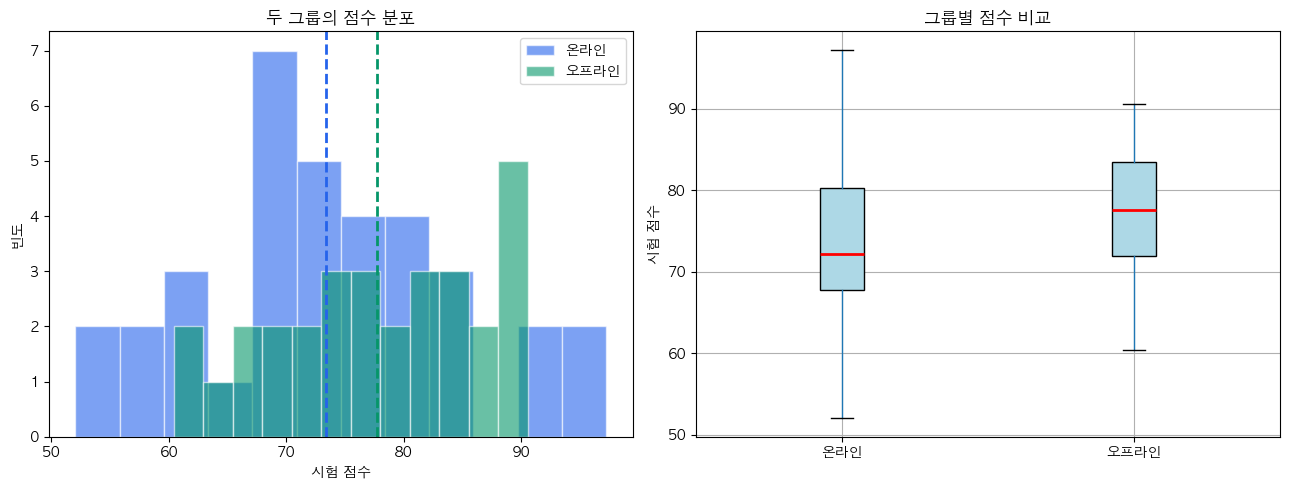

In [19]:
# 시각화: 두 그룹 비교
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# 히스토그램 비교
axes[0].hist(online, bins=12, alpha=0.6, color='#2563EB', edgecolor='white', label='온라인')
axes[0].hist(offline, bins=12, alpha=0.6, color='#059669', edgecolor='white', label='오프라인')
axes[0].axvline(np.mean(online), color='#2563EB', linestyle='--', linewidth=2)
axes[0].axvline(np.mean(offline), color='#059669', linestyle='--', linewidth=2)
axes[0].set_xlabel('시험 점수')
axes[0].set_ylabel('빈도')
axes[0].set_title('두 그룹의 점수 분포', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)

# 박스플롯
data_box = pd.DataFrame({
    '온라인': pd.Series(online),
    '오프라인': pd.Series(offline)
})
data_box.boxplot(ax=axes[1], patch_artist=True,
                 boxprops=dict(facecolor='lightblue'),
                 medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('시험 점수')
axes[1].set_title(f'그룹별 점수 비교', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 문제 3-1: 독립표본 t-검정 수행

**(a)** 가설을 설정하세요.

> 두 강의 방식의 효과에 차이가 있는지 (양측검정)

**(b)** `stats.ttest_ind()`로 검정하세요.

> `equal_var=False`를 사용하여 Welch's t-test를 수행하세요 (등분산 가정 없이).

**(c)** α = 0.05에서 결론을 내리세요.

In [31]:
print("\n[문제 3-1] 독립표본 t-검정")
print("-" * 40)

alpha = 0.05

# TODO (a): 가설 설정
print("[1단계] 가설 설정")
print(f"  H0: online = offline  (두 강의 효과가 같다)")
print(f"  H1: online ≠ offline  (두 강의 효과에 차이가 있다) -> 양측검정")   # 방향을 결정하세요
print(f"  검정 유형: 독립표본 t-검정 (independent two-sample t-test)")

print(f"\n[2단계] 유의수준: alpha = {alpha}")

# TODO (b): Welch's t-test
t_stat, p_value = stats.ttest_ind(online, offline, equal_var=False) # equal_var: 두 그룹의 분산이 같은지 유무

# TODO (c): 결론
# 유의수준 alpha = 0.05
print(f"  {p_value:.2f} > {alpha} 로, p-value가 유의수준보다 높으니 귀무가설 (두 강의 효과가 같다)를 기각할 수 없다")


[문제 3-1] 독립표본 t-검정
----------------------------------------
[1단계] 가설 설정
  H0: online = offline  (두 강의 효과가 같다)
  H1: online ≠ offline  (두 강의 효과에 차이가 있다) -> 양측검정
  검정 유형: 독립표본 t-검정 (independent two-sample t-test)

[2단계] 유의수준: alpha = 0.05
  0.08 > 0.05 로, p-value가 유의수준보다 높으니 귀무가설 (두 강의 효과가 같다)를 기각할 수 없다


### 문제 3-2: 효과크기 (Cohen's d)

**(a)** Cohen's d를 계산하세요.

> 공식: $d = \frac{|\bar{X}_1 - \bar{X}_2|}{s_{pooled}}$
>
> $s_{pooled} = \sqrt{\frac{(n_1-1) s_1^2 + (n_2-1) s_2^2}{n_1 + n_2 - 2}}$

**(b)** 효과크기를 해석하세요. (작은/중간/큰 효과)

| d 값  | 해석      |
|-------|-----------|
| 0.2   | 작은 효과 |
| 0.5   | 중간 효과 |
| 0.8   | 큰 효과   |

**(c)** p-value 결과와 효과크기를 종합하여 최종 판단을 내리세요.

In [21]:
print("\n[문제 3-2] 효과크기 (Cohen's d)")
print("-" * 40)

n1, n2 = len(online), len(offline)
s1 = np.std(online, ddof=1)
s2 = np.std(offline, ddof=1)

# TODO (a): Cohen's d 계산

# TODO (b): 해석

# TODO (c): 종합 판단


[문제 3-2] 효과크기 (Cohen's d)
----------------------------------------


### 문제 3-3: 적절한 t검정 선택

아래 각 상황에서 어느 검정을 사용해야 하는지 고르고, 그 이유를 간단히 적어보세요.

**보기**: 단일표본 t-검정 / 독립표본 t-검정(Student's) / 독립표본 t-검정(Welch's) / 대응표본 t-검정

**(a)** 제과업체에서 과자 1봉지의 규격 중량은 150g입니다. 생산라인에서 12봉지를 샘플링하여 규격에 맞는지 확인하려 합니다.

**(b)** A반(30명)과 B반(28명) 학생들의 수학 점수 차이를 비교 (두 반의 분산이 비슷함)

**(c)** A공장(25개)과 B공장(30개) 배터리 수명을 비교하려 하는데, 두 공장의 분산이 같은지 모릅니다.

**(d)** 같은 환자 20명에게 치료 전후 혈압을 측정하여 치료 효과를 검증

**(e)** 만약 (d)의 데이터를 독립표본 t-검정으로 잘못 분석하면 어떤 문제가 생기나요?

In [22]:
print("\n[문제 3-3] 적절한 t검정 선택")
print("-" * 40)
print("보기: 단일표본 t-검정 / 독립표본 t-검정(Student's) /")
print("      독립표본 t-검정(Welch's) / 대응표본 t-검정")

# TODO (a)
print("\n(a) 제과업체에서 과자 1봉지의 규격 중량은 150g입니다.")
print("    생산라인에서 12봉지를 샘플링하여 규격에 맞는지 확인하려 합니다.")
# print(f"    사용할 검정: ...")
# print(f"    이유: ...")

# TODO (b)
print("\n(b) A반(30명)과 B반(28명) 학생들의 수학 점수 차이를 비교")
print("    (두 반의 분산이 비슷함)")
# print(f"    사용할 검정: ...")
# print(f"    이유: ...")

# TODO (c)
print("\n(c) A공장(25개)과 B공장(30개) 배터리 수명을 비교하려 하는데,")
print("    두 공장의 분산이 같은지 모릅니다.")
# print(f"    사용할 검정: ...")
# print(f"    이유: ...")

# TODO (d)
print("\n(d) 같은 환자 20명에게 치료 전후 혈압을 측정하여 치료 효과를 검증")
# print(f"    사용할 검정: ...")
# print(f"    이유: ...")

# TODO (e)
print("\n(e) 만약 (d)의 데이터를 독립표본 t-검정으로 잘못 분석하면")
print("    어떤 문제가 생기나요?")
# print(f"    문제점: ...")


[문제 3-3] 적절한 t검정 선택
----------------------------------------
보기: 단일표본 t-검정 / 독립표본 t-검정(Student's) /
      독립표본 t-검정(Welch's) / 대응표본 t-검정

(a) 제과업체에서 과자 1봉지의 규격 중량은 150g입니다.
    생산라인에서 12봉지를 샘플링하여 규격에 맞는지 확인하려 합니다.

(b) A반(30명)과 B반(28명) 학생들의 수학 점수 차이를 비교
    (두 반의 분산이 비슷함)

(c) A공장(25개)과 B공장(30개) 배터리 수명을 비교하려 하는데,
    두 공장의 분산이 같은지 모릅니다.

(d) 같은 환자 20명에게 치료 전후 혈압을 측정하여 치료 효과를 검증

(e) 만약 (d)의 데이터를 독립표본 t-검정으로 잘못 분석하면
    어떤 문제가 생기나요?


---

## 문제 4: 대응표본 t-검정과 검정력

### 시나리오: 영어 학습 앱 효과 검증

교육 회사가 새로운 영어 학습 앱의 효과를 검증합니다.

15명의 학생이 앱 사용 전후에 영어 시험을 치렀습니다.

**주어진 데이터:**

In [23]:
print("\n[문제 4] 영어 학습 앱 효과 검증")
print("=" * 50)

np.random.seed(42)
n_students = 15

before_scores = np.random.normal(loc=65, scale=10, size=n_students)
improvement = np.random.normal(loc=5, scale=6, size=n_students)
after_scores = before_scores + improvement

before_scores = np.round(before_scores, 1)
after_scores = np.round(after_scores, 1)

print(f"{'학생':>4} {'사전':>8} {'사후':>8} {'변화':>8}")
print("-" * 32)
for i in range(n_students):
    diff = after_scores[i] - before_scores[i]
    print(f"  {i+1:>2d}   {before_scores[i]:>6.1f}   {after_scores[i]:>6.1f}   {diff:>+6.1f}")

print(f"\n사전 평균: {np.mean(before_scores):.2f}")
print(f"사후 평균: {np.mean(after_scores):.2f}")
print(f"차이 평균: {np.mean(after_scores - before_scores):.2f}")



[문제 4] 영어 학습 앱 효과 검증
  학생       사전       사후       변화
--------------------------------
   1     70.0     71.6     +1.6
   2     63.6     62.5     -1.1
   3     71.5     78.4     +6.9
   4     80.2     79.8     -0.4
   5     62.7     59.2     -3.5
   6     62.7     76.5    +13.8
   7     80.8     84.4     +3.6
   8     72.7     78.1     +5.4
   9     60.3     56.8     -3.5
  10     70.4     72.2     +1.8
  11     60.4     66.0     +5.6
  12     60.3     58.4     -1.9
  13     67.4     74.7     +7.3
  14     45.9     47.3     +1.4
  15     47.8     51.0     +3.2

사전 평균: 65.11
사후 평균: 67.79
차이 평균: 2.68


### 문제 4-1: 대응표본 t-검정

**(a)** 가설을 설정하세요.

**(b)** 검정을 수행하세요.

**(c)** α = 0.05에서 결론을 내리세요.

**(d)** 차이(d = 사후 - 사전)의 95% 신뢰구간을 구하세요.

In [24]:
print("\n[문제 4-1] 대응표본 t-검정")
print("-" * 40)

alpha = 0.05
differences = after_scores - before_scores

# TODO (a): 가설 설정

# TODO (b): 대응표본 t-검정

# TODO (c): 결론

# TODO (d): 차이의 95% 신뢰구간



[문제 4-1] 대응표본 t-검정
----------------------------------------


### 문제 4-2 (도전!) : 검정력 분석 

앱의 실제 효과가 **평균 5점 향상**이라고 가정합니다.

현재 표본(n=15)으로 이 효과를 탐지할 수 있는 확률(검정력)은 얼마인가요?

> 힌트: `TTestPower.solve_power()`를 사용하세요. effect_size에는 Cohen's d = mu_d / s_d 를 넣어야 합니다.

**(a)** 현재 표본크기(n=15)에서의 검정력을 계산하세요.

**(b)** 80% 검정력을 달성하려면 최소 몇 명이 필요한가요? 

**(c)** 검정력 곡선을 그리세요. (x축: 표본크기 n, y축: 검정력 Power)
> 힌트: n을 5~100 범위로 변화시키며 각각의 검정력을 계산하고, 80% 기준선도 함께 표시하세요.


In [25]:
print("\n[문제 4-2] 검정력 분석")
print("-" * 40)

# 가정
mu_d = 5           # 가정한 평균 차이 (점)
s_d = np.std(differences, ddof=1)  # 차이의 표준편차

print(f"가정: 실제 효과 = {mu_d}점 향상")
print(f"차이의 표준편차 sd = {s_d:.2f}")


# TODO (a): 현재 검정력 (n=15)

# TODO (b): 80% 검정력에 필요한 표본크기


[문제 4-2] 검정력 분석
----------------------------------------
가정: 실제 효과 = 5점 향상
차이의 표준편차 sd = 4.66


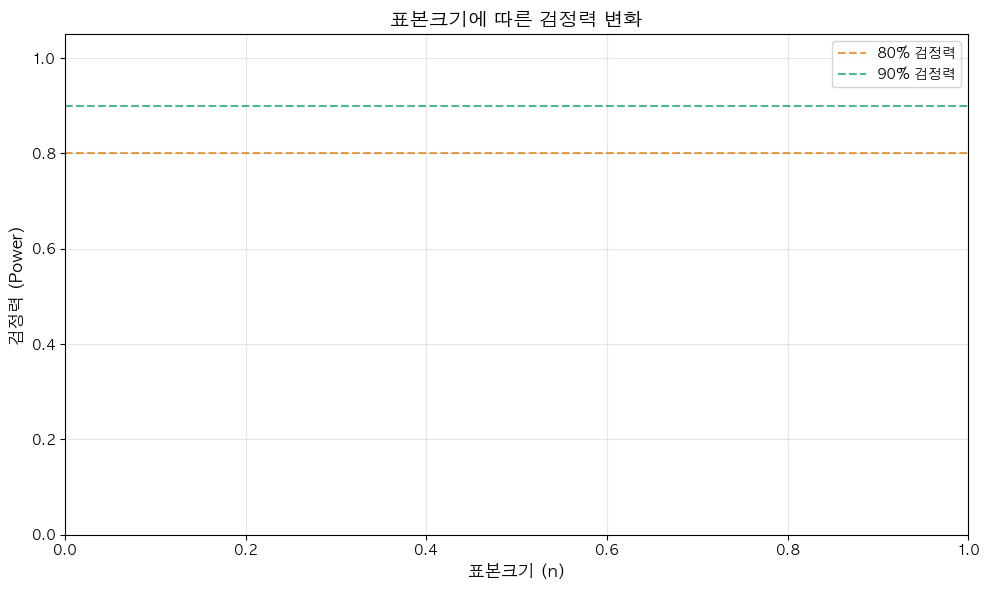

In [26]:
# TODO (c): 검정력 곡선 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# TODO: n_range에 대해 검정력을 계산하고 plot 하세요
# n_range = np.arange(5, 101)
# powers = []
# for n in n_range:
#     ...

ax.axhline(0.80, color='#D97706', linestyle='--', alpha=0.7, label='80% 검정력')
ax.axhline(0.90, color='#059669', linestyle='--', alpha=0.7, label='90% 검정력')
ax.set_xlabel('표본크기 (n)', fontsize=12)
ax.set_ylabel('검정력 (Power)', fontsize=12)
ax.set_title('표본크기에 따른 검정력 변화', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)
ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()